In [5]:
# Notebook for article https://habrahabr.ru/post/328760/

In [6]:
import pandas as pnd
import numpy as nmp
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [7]:
def generateData(minValue, maxValue, N, dim):
    return minValue + nmp.random.rand(N, dim) * (maxValue - minValue)

def getCoefficients(text, regressor, X, y):
    regressor.fit(X, y)
    print(text, regressor.intercept_, regressor.coef_)
    print("error:", mean_squared_error(y, regressor.predict(X)))

In [8]:
N = 100
minValue = -10.0
maxValue = 10.0

alpha = 0.7

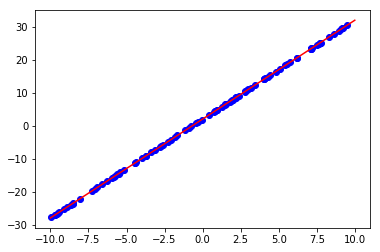

Ordinary: 2.0 [ 3.]
error: 5.3642541555e-31
Ridge for alpha = 0.7: 2.00009364939 [ 2.99933672]
error: 1.39258631864e-05
Lasso for alpha = 0.7: 2.00312233664 [ 2.97788568]
error: 0.0154800256533


In [9]:
# 1D without noise

nmp.random.seed(17091992)

X = generateData(minValue, maxValue, N, 1)
X1 = X[:, 0]
Y = 2 + 3 * X1
pnd.DataFrame({"x1": X1,
               "y": Y}).to_csv("../temp/1D_wo_noise.csv", index = False)

plt.scatter(X1, Y, color = "blue")
plt.plot([-10, 10], [-28, 32], color = "red")
plt.show()

getCoefficients("Ordinary:", LinearRegression(), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha), X, Y)

In [10]:
# 5D without noise

nmp.random.seed(17091992)

X = generateData(minValue, maxValue, N, 5)
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
X4 = X[:, 3]
X5 = X[:, 4]
Y = X1 - 2 * X2 + 3 * X3 - 4 * X4 + 5 * X5
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "x3": X3,
               "x4": X4,
               "x5": X5,
               "y": Y}).to_csv("../temp/5D_wo_noise.csv", index = False)

getCoefficients("Ordinary:", LinearRegression(), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha), X, Y)

Ordinary: 4.4408920985e-16 [ 1. -2.  3. -4.  5.]
error: 1.13795354946e-27
Ridge for alpha = 0.7: 0.000401607943116 [ 0.99960838 -1.99957428  2.99928537 -3.99928026  4.99887621]
error: 8.31756941033e-05
Lasso for alpha = 0.7: 0.0130751114155 [ 0.97296114 -1.97953117  2.97903533 -3.98190095  4.97312897]
error: 0.0794065287839


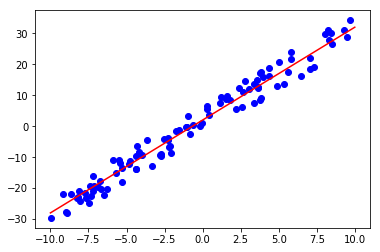

Ordinary: 2.11782397958 [ 3.06236779]
error: 7.79978026054
Ridge for alpha = 0.7: 2.11726849351 [ 3.06163425]
error: 7.79979598151
Lasso for alpha = 0.7: 2.09968052979 [ 3.03840845]
error: 7.81655180062


In [12]:
# 1D with noise

nmp.random.seed(17091992)

eps = 5.0
noise = generateData(-eps, eps, N, 1)[:, 0]

X = generateData(minValue, maxValue, N, 1)
X1 = X[:, 0]
Y = 2 + 3 * X1 + noise
pnd.DataFrame({"x1": X1,
               "y": Y}).to_csv("../temp/1D_w_noise.csv", index = False)
plt.scatter(X1, Y, color = "blue")
plt.plot([-10, 10], [-28, 32], color = "red")
plt.show()

getCoefficients("Ordinary:", LinearRegression(), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha), X, Y)

In [13]:
# 3D with noise

nmp.random.seed(17091992)

eps = 5.0
noise = generateData(-eps, eps, N, 1)[:, 0]

X = generateData(-10.0, 10.0, 100, 3)
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
Y = X1 - 2 * X2 + 3 * X3 + noise
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "x3": X3,
               "y": Y}).to_csv("../temp/3D_w_noise.csv", index = False)

getCoefficients("Ordinary:", LinearRegression(), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha), X, Y)

Ordinary: -0.0713061674934 [ 0.88248913 -2.00381902  2.94674983]
error: 7.48216199159
Ridge for alpha = 0.7: -0.0717581588853 [ 0.88223814 -2.00335263  2.94602959]
error: 7.48218493508
Lasso for alpha = 0.7: -0.0968768865025 [ 0.85549841 -1.98187142  2.92095894]
error: 7.53447248455
